In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


In [2]:
a = np.arange(1,55).reshape((3,3,6))
print(f'a:\n{a}')
b = np.pad(a, ((1,1),(1,1),(2,2)), 'constant')
print(f'b:\n{b}')
print(f'a\':\n{a}')

a:
[[[ 1  2  3  4  5  6]
  [ 7  8  9 10 11 12]
  [13 14 15 16 17 18]]

 [[19 20 21 22 23 24]
  [25 26 27 28 29 30]
  [31 32 33 34 35 36]]

 [[37 38 39 40 41 42]
  [43 44 45 46 47 48]
  [49 50 51 52 53 54]]]
b:
[[[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  1  2  3  4  5  6  0  0]
  [ 0  0  7  8  9 10 11 12  0  0]
  [ 0  0 13 14 15 16 17 18  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0 19 20 21 22 23 24  0  0]
  [ 0  0 25 26 27 28 29 30  0  0]
  [ 0  0 31 32 33 34 35 36  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0 37 38 39 40 41 42  0  0]
  [ 0  0 43 44 45 46 47 48  0  0]
  [ 0  0 49 50 51 52 53 54  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0]


In [3]:
def padding(X, pad):
    
    '''
    X - 4-d array, 0d:m_samples, 1d:height, 2d:width, 3d:channels
    pad - int, padding in both height and width
    '''

    X_padding = np.pad(
        X,
        (
            (0,0),      # 0d: m_samples
            (pad,pad),  # 1d: height
            (pad,pad),  # 2d: width
            (0,0)),     # 3d: channels
        'constant')
    
    return X_padding

In [7]:
a = a.reshape((1,3,6,3)) + 150
print(f'a: {a.shape}\n{a}')
a_padding = padding(a, 2)
print(f'a_padding: {a_padding.shape}\n{a_padding}')

a: (1, 3, 6, 3)
[[[[151 152 153]
   [154 155 156]
   [157 158 159]
   [160 161 162]
   [163 164 165]
   [166 167 168]]

  [[169 170 171]
   [172 173 174]
   [175 176 177]
   [178 179 180]
   [181 182 183]
   [184 185 186]]

  [[187 188 189]
   [190 191 192]
   [193 194 195]
   [196 197 198]
   [199 200 201]
   [202 203 204]]]]
a_padding: (1, 7, 10, 3)
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [151 152 153]
   [154 155 156]
   [157 158 159]
   [160 161 162]
   [163 164 165]
   [166 167 168]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [169 170 171]
   [172 173 174]
   [175 176 177]
   [178 179 180]
   [181 182 183]
   [184 185

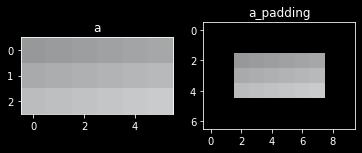

In [8]:
plt.subplot(1, 2, 1)
plt.title('a')
plt.imshow(a[0])
plt.subplot(1, 2, 2)
plt.title('a_padding')
plt.imshow(a_padding[0])

In [10]:
def conv_one_step(x, W, b):
    
    '''
    x - part of X: shape(m, f, f, c)
    W - weights of filter: shape(f, f, c)
    b - bias of filter: shape(1, 1, 1)
    return shape(m,)
    '''

    z = np.sum(x * W, axis=(1,2,3)) + b  # shape(m,)
    
    return z

In [18]:
def conv_prop(X, W, b, p=0, s=1):

    '''
    X - input, (m_samples, height, width, channels)
    W - weights of filters, (f, f, channels, n_filters)
    b - bias of filters, (1,1,1,n_filters)
    p - pad
    s - stride
    '''

    m, h, w, c = X.shape
    f = W.shape[0]
    n = W.shape[3]
    h_new = (h + 2*p - f) // s + 1
    w_new = (w + 2*p - f) // s + 1
    c_new = n
    Z = np.zeros((m, h_new, w_new, c_new))
    X_padding = padding(X, p)

    for l in range(c_new):
        for i in range(h_new):
            for j in range(w_new):
                x_step = X_padding[:, (s*i):(s*i+f), (s*j):(s*j+f), :]  # shape(m,f,f,c)
                W_step = W[:, :, :, l]  # shape(f,f,c)
                b_step = b[:, :, :, l]  # shape(1,1,1)
                Z[:, i, j, l] = conv_one_step(x_step, W_step, b_step)  # shape(m,)
    
    cache = (X, W, b, p, s)
    return Z, cache


In [20]:
# 测试
X = np.ones((2,5,5,3))
W = np.ones((3,3,3,6)) * 2
b = np.ones((1,1,1,6)) * 3
Z, _ = conv_prop(X, W, b)  # ones((2,3,3,6)) * 57
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 3, 3, 6)
[[[[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]]


 [[[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]

  [[57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]]]]


In [22]:
# 加上pad测试same convolution
X = np.ones((2,5,5,3))
W = np.ones((3,3,3,6)) * 2
b = np.ones((1,1,1,6)) * 3
Z, _ = conv_prop(X, W, b, p=1)  # ones((2,5,5,6)) mid=57
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 5, 5, 6)
[[[[27. 27. 27. 27. 27. 27.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [27. 27. 27. 27. 27. 27.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [39. 39. 39. 39. 39. 39.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [39. 39. 39. 39. 39. 39.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [39. 39. 39. 39. 39. 39.]]

  [[27. 27. 27. 27. 27. 27.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [27. 27. 27. 27. 27. 27.]]]


 [[[27. 27. 27. 27. 27. 27.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [39. 39. 39. 39. 39. 39.]
   [27. 27. 27. 27. 27. 27.]]

  [[39. 39. 39. 39. 39. 39.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 57. 57. 57. 57.]
   [57. 57. 5

In [23]:
def pool_prop(X, f, mode='max', p=0, s=1):

    '''
    X - input, (m_samples, height, width, channels)
    f - size of pool(f, f)
    mode - str, 'max' or 'average' pooling
    p - pad
    s - stride
    '''

    m, h, w, c = X.shape
    h_new = (h + 2*p - f) // s + 1
    w_new = (w + 2*p - f) // s + 1
    c_new = c
    Z = np.zeros((m, h_new, w_new, c_new))
    X_padding = padding(X, p)

    for l in range(c_new):
        for i in range(h_new):
            for j in range(w_new):
                x_step = X_padding[:, (s*i):(s*i+f), (s*j):(s*j+f), l]  # shape(m,f,f)
                if mode == 'max':
                    Z[:, i, j, l] = np.max(x_step, axis=(1,2))  # shape(m,)
                elif mode == 'average':
                    Z[:, i, j, l] = np.mean(x_step, axis=(1,2))  # shape(m,)
    
    cache = (X, f, p, s)
    return Z, cache


In [24]:
# 测试
a = np.arange(72).reshape((2,4,3,3))
f = 2
Z, _ = pool_prop(a, f)  # (2,3,2,3)
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 3, 2, 3)
[[[[12. 13. 14.]
   [15. 16. 17.]]

  [[21. 22. 23.]
   [24. 25. 26.]]

  [[30. 31. 32.]
   [33. 34. 35.]]]


 [[[48. 49. 50.]
   [51. 52. 53.]]

  [[57. 58. 59.]
   [60. 61. 62.]]

  [[66. 67. 68.]
   [69. 70. 71.]]]]


In [26]:
# 试试same average pooling
a = np.arange(72).reshape((2,4,3,3))
f = 3
Z, _ = pool_prop(a, f, mode='average', p=1)  # (2,4,3,3)
print(f'Z: {Z.shape}\n{Z}')

Z: (2, 4, 3, 3)
[[[[ 2.66666667  3.11111111  3.55555556]
   [ 5.          5.66666667  6.33333333]
   [ 4.          4.44444444  4.88888889]]

  [[ 7.          7.66666667  8.33333333]
   [12.         13.         14.        ]
   [ 9.          9.66666667 10.33333333]]

  [[13.         13.66666667 14.33333333]
   [21.         22.         23.        ]
   [15.         15.66666667 16.33333333]]

  [[10.66666667 11.11111111 11.55555556]
   [17.         17.66666667 18.33333333]
   [12.         12.44444444 12.88888889]]]


 [[[18.66666667 19.11111111 19.55555556]
   [29.         29.66666667 30.33333333]
   [20.         20.44444444 20.88888889]]

  [[31.         31.66666667 32.33333333]
   [48.         49.         50.        ]
   [33.         33.66666667 34.33333333]]

  [[37.         37.66666667 38.33333333]
   [57.         58.         59.        ]
   [39.         39.66666667 40.33333333]]

  [[26.66666667 27.11111111 27.55555556]
   [41.         41.66666667 42.33333333]
   [28.         28.444444

### 以上实现了padding，convolution，pooling